In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv('liver.csv')

In [7]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [9]:
data.shape

(583, 11)

In [10]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

#Data-Cleaning

In [11]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [12]:
data.duplicated().sum()

13

In [13]:
data=data.drop_duplicates()

In [14]:
data.shape

(570, 11)

#Missing values



In [15]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

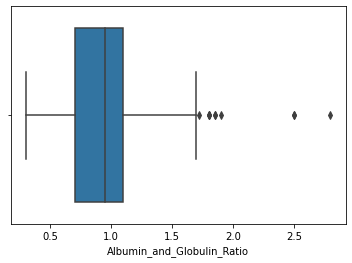

In [16]:
sns.boxplot(data=data,x='Albumin_and_Globulin_Ratio')

Filling Missing values using Mean,Median,Mode

In [17]:
data['Albumin_and_Globulin_Ratio'].mode()

0    1.0
dtype: float64

In [18]:
data['Albumin_and_Globulin_Ratio'].median()

0.95

In [19]:
data['Albumin_and_Globulin_Ratio'].mean()

0.9480035335689044

In [20]:
data['Albumin_and_Globulin_Ratio']=data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median())

In [21]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

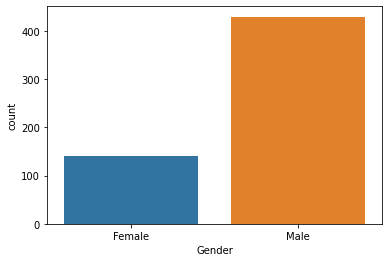

In [22]:
sns.countplot(data=data,x='Gender',label='count')

Encoding the Gender column to Numerical

In [23]:
def numerical(x):
  if x=="Male":
    return 1
  return 0

data['Gender']=data['Gender'].map(numerical)

In [24]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Converting dependent columns into 0's and 1's

In [25]:
def num1(x):
  if x==2:
    return 0
  return 1
data['Dataset']=data['Dataset'].map(num1)

In [26]:
data['Dataset']

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 570, dtype: int64

#Correlation Matrix

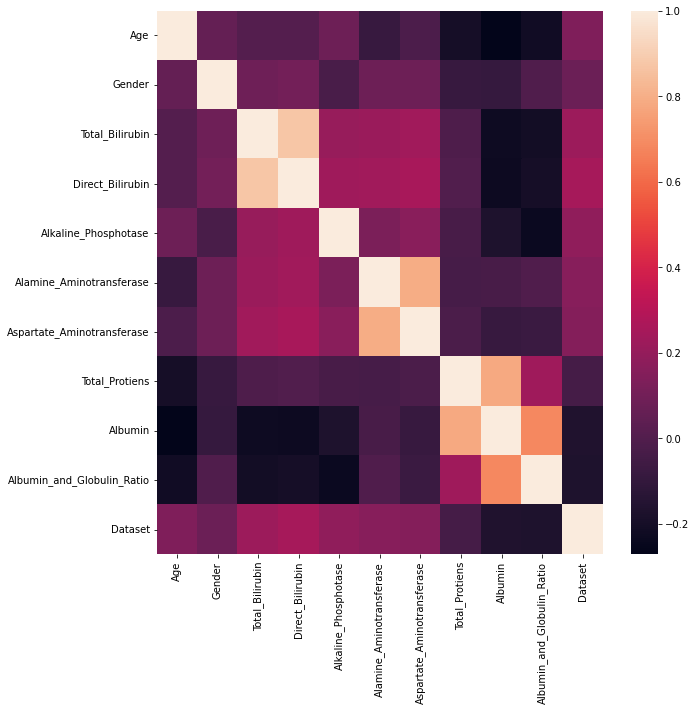

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

#Splitting dataset into training and testing 

In [28]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [30]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

#Building Machine learning Models

Logistic Regression 

In [31]:
from sklearn.linear_model import LogisticRegression 
logi_class=LogisticRegression(random_state=0)
logi_class.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [32]:
#predicting the output
log_y_pred=logi_class.predict(x_test)

verify the model accuracy

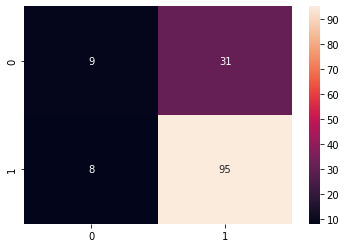

In [33]:
from sklearn.metrics import confusion_matrix
log_cm=confusion_matrix(y_test,log_y_pred)
sns.heatmap(log_cm,annot=True)

In [34]:
from sklearn.metrics import accuracy_score
print("Accuracy of Model: ",accuracy_score(y_test,log_y_pred))

Accuracy of Model:  0.7272727272727273


#SVM 

In [35]:
from sklearn.svm import SVC
svm1=SVC(kernel='rbf',random_state=0)
svm1.fit(x_train,y_train)

SVC(random_state=0)

In [36]:
#predicting test set 
y_pred=svm1.predict(x_test)

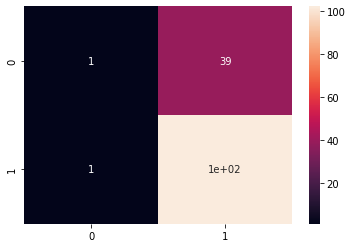

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [43]:
from sklearn.metrics import accuracy_score
print("Accuracy of Model: ",accuracy_score(y_test,y_pred))

Accuracy of Model:  0.7202797202797203
